In [ ]:
qtconsole

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.animation as anim

%matplotlib inline

In [2]:
plt.style.use('seaborn')

Loading CSV:

In [3]:
names = pd.read_csv('names_nationaldata.csv')

In [4]:
names.head()

,name,sex,number,year
0,Mary,F,54901,1939
1,Barbara,F,37258,1939
2,Patricia,F,29706,1939
3,Betty,F,23641,1939
4,Shirley,F,20445,1939


In [5]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
name      object
sex       object
number    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [6]:
print(names.year.min())
print(names.year.max())

1880
2018


# EDA

## Total names listed per year

Text(0.5, 1.0, 'Number of names listed per year')

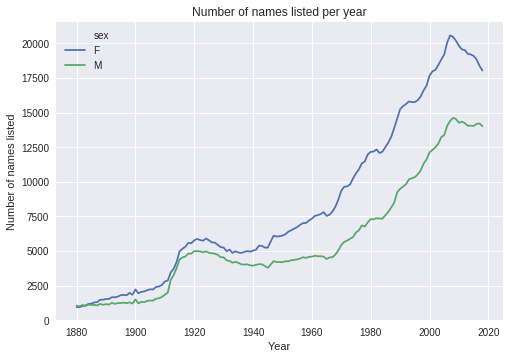

In [149]:
nameslistedperyear = names.groupby(['year', 'sex'])[['name']].count().reset_index()
ax = sns.lineplot(x='year', y='name', hue='sex', data=nameslistedperyear)

ax.xaxis.set_label_text('Year')
ax.yaxis.set_label_text('Number of names listed')
ax.set_title('Number of names listed per year')

The number of names listed each year has increased. So there must be new names coming into fashion.

## Trends in names

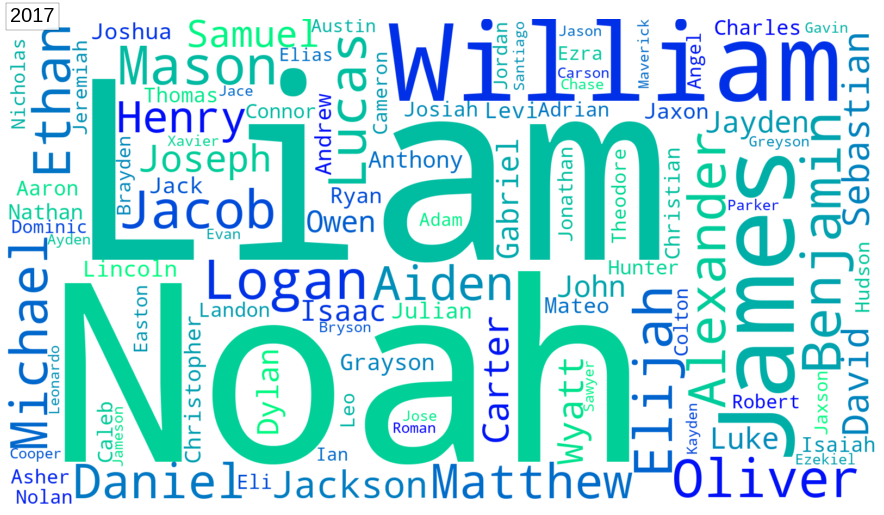

In [138]:
# Making wordclouds of top 100 names per year

colormaps = {'M':'winter', 'F':'spring'}
figwidth = 16 #inches
figheight = 9 #inches
yearsrange = range(names.year.min(), names.year.max())

# creating figure to be saved
fig = plt.figure(figsize=(figwidth,figheight))
_ = plt.axis("off")

for s in ['M', 'F']:
    images = []
    for yr in yearsrange:
        # save a temporary dataframe of names and numbers per sex, per year
        tempM = names[['name', 'number']][np.logical_and(names.sex==s, names.year==yr)].sort_values(['number', 'name'], 
                                                                                                    ascending=False)
        # extract the bottom 100 names in popularity
        tempM = tempM.to_numpy()[:100]
        # create wordcloud object
        wordcloud = WordCloud(background_color="white", width=figwidth*100, height=figheight*100, colormap=colormaps[s])
        wordcloud = wordcloud.generate_from_frequencies(dict(tempM))
        plt_im = plt.imshow(wordcloud, interpolation="bilinear")
        plt_txt = plt.text(5, 5, str(yr), color='black', fontsize=20, bbox=dict(facecolor='white', alpha=0.9))
        images.append([plt_im, plt_txt])
    animation = anim.ArtistAnimation(fig, images)
    animation.save('top100{}names_{}x{}.gif'.format(s,figwidth,figheight), writer='imagemagick', fps=4)
    animation.save('top100{}names_{}x{}.mp4'.format(s,figwidth,figheight), writer='ffmpeg', fps=4)

## Plotting name history

In [139]:
# Separating male and female names
namesM = names[names.sex=='M'].reset_index(drop=True)
namesF = names[names.sex=='F'].reset_index(drop=True)
# Pivot to have names in columns and years as index
namesMperYear = namesM.pivot(index='year', columns='name', values='number')
namesMperYear = namesMperYear.replace(to_replace=np.NaN, value=0)
namesMperYear = 
namesFperYear = namesF.pivot(index='year', columns='name', values='number')
namesFperYear = namesFperYear.replace(to_replace=np.NaN, value=0)

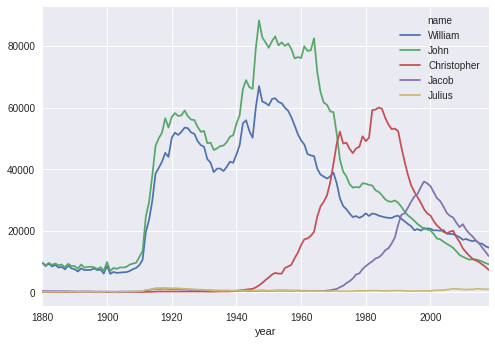

In [151]:
namesMperYear[['William', 'John', 'Christopher', 'Jacob', 'Julius']].plot()

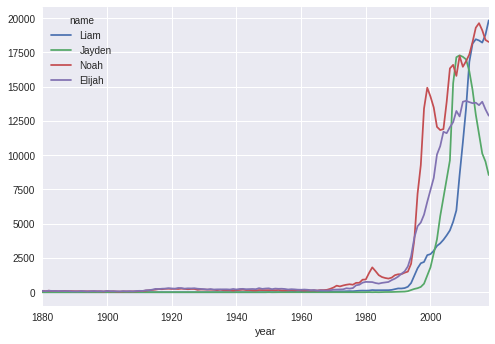

In [160]:
namesMperYear[['Liam', 'Jayden', 'Noah', 'Elijah']].plot()

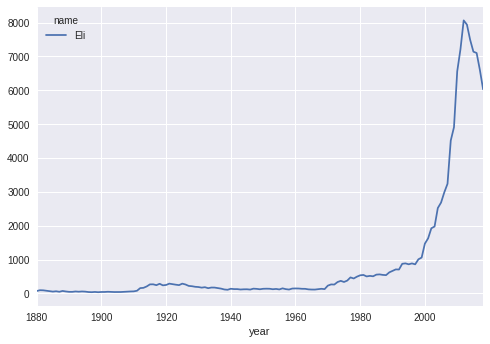

In [226]:
namesMperYear[['Eli']].plot()

In [170]:
namesMperYear.tail()

name,Aaban,Aabid,Aabir,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyshonne,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyus,Zyvion,Zyvon,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
2014,16.0,0.0,0.0,19.0,8.0,18.0,239.0,0.0,25.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2015,15.0,0.0,0.0,22.0,10.0,15.0,297.0,0.0,31.0,5.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,7.0,0.0,0.0
2016,9.0,5.0,5.0,18.0,0.0,11.0,196.0,0.0,28.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,11.0,0.0,0.0,18.0,8.0,15.0,241.0,7.0,31.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,7.0,6.0,5.0,19.0,0.0,10.0,171.0,0.0,25.0,8.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,5.0


In [170]:
namesMperYear[np.logical_and( na
)]

name,Aaban,Aabid,Aabir,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyshonne,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyus,Zyvion,Zyvon,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
2014,16.0,0.0,0.0,19.0,8.0,18.0,239.0,0.0,25.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2015,15.0,0.0,0.0,22.0,10.0,15.0,297.0,0.0,31.0,5.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,7.0,0.0,0.0
2016,9.0,5.0,5.0,18.0,0.0,11.0,196.0,0.0,28.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,11.0,0.0,0.0,18.0,8.0,15.0,241.0,7.0,31.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,7.0,6.0,5.0,19.0,0.0,10.0,171.0,0.0,25.0,8.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,5.0


In [206]:
namesMperYear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 41475 entries, Aaban to Zzyzx
dtypes: float64(41475)
memory usage: 44.0 MB


In [198]:
namesMperYear.iloc[-1].sum()

1800392.0

In [202]:
namesMperYear.iloc[:,0].sum()

114.0

In [228]:
totalsperyear = namesMperYear.apply(np.sum, axis=1) / 100
namesMperYearPercent = namesMperYear.divide(totalsperyear, axis=0)
namesMperYearPercent.tail()

name,Aaban,Aabid,Aabir,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyshonne,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyus,Zyvion,Zyvon,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
2014,0.000835,0.000000,0.000000,0.000991,0.000417,0.000939,0.012470,0.00000,0.001304,0.000000,...,0.0,0.0,0.000417,0.0,0.0,0.000000,0.0,0.000000,0.000313,0.000000
2015,0.000785,0.000000,0.000000,0.001151,0.000523,0.000785,0.015537,0.00000,0.001622,0.000262,...,0.0,0.0,0.000000,0.0,0.0,0.000262,0.0,0.000366,0.000000,0.000000
2016,0.000476,0.000264,0.000264,0.000952,0.000000,0.000582,0.010362,0.00000,0.001480,0.000317,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2017,0.000597,0.000000,0.000000,0.000977,0.000434,0.000814,0.013078,0.00038,0.001682,0.000326,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2018,0.000389,0.000333,0.000278,0.001055,0.000000,0.000555,0.009498,0.00000,0.001389,0.000444,...,0.0,0.0,0.000000,0.0,0.0,0.000333,0.0,0.000000,0.000000,0.000278


In [238]:
namesMperYearPercent.head()

name,Aaban,Aabid,Aabir,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyshonne,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyus,Zyvion,Zyvon,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


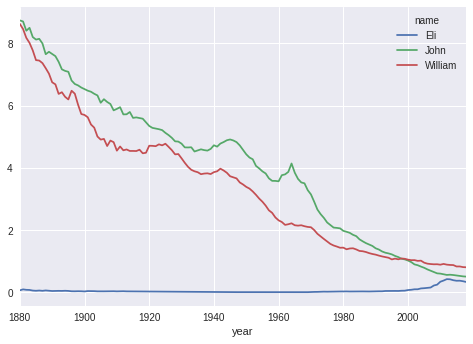

In [232]:
namesMperYearPercent[['Eli', 'John', 'William']].plot()

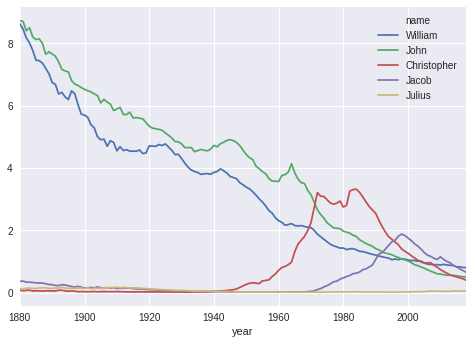

In [233]:
namesMperYearPercent[['William', 'John', 'Christopher', 'Jacob', 'Julius']].plot()

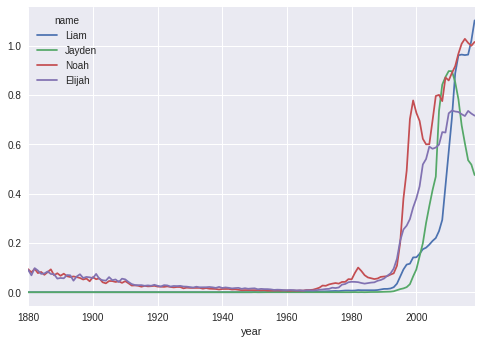

In [234]:
namesMperYearPercent[['Liam', 'Jayden', 'Noah', 'Elijah']].plot()

Not gonna use this:

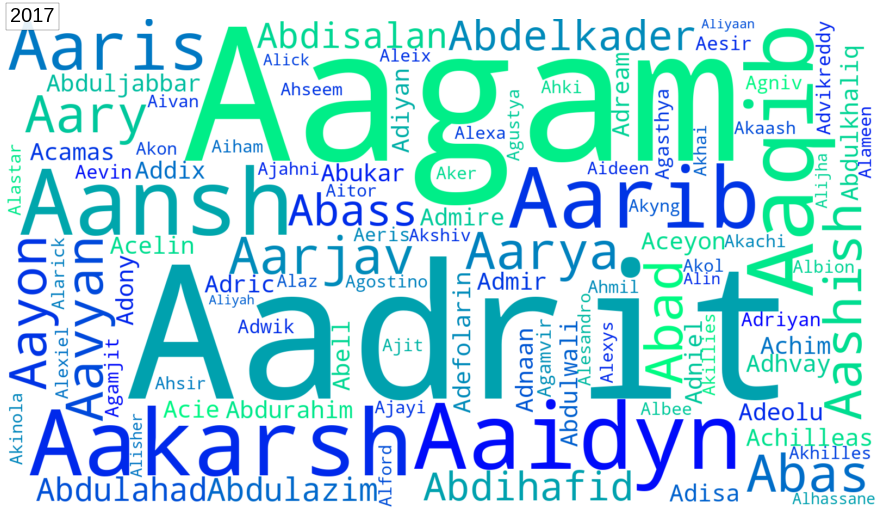

In [236]:
# Making wordclouds of bottom 100 names per year

colormaps = {'M':'winter', 'F':'spring'}
figwidth = 16 #inches
figheight = 9 #inches
yearsrange = range(names.year.min(), names.year.max())

# creating figure to be saved
fig = plt.figure(figsize=(figwidth,figheight))
_ = plt.axis("off")

for s in ['M', 'F']:
    images = []
    for yr in yearsrange:
        # save a temporary dataframe of names and numbers per sex, per year
        tempM = names[['name', 'number']][np.logical_and(names.sex==s, names.year==yr)].sort_values(['number','name'])
        # extract the bottom 100 names in popularity
        tempM = tempM.to_numpy()[:100]
        # create wordcloud object
        wordcloud = WordCloud(background_color="white", width=figwidth*100, height=figheight*100, colormap=colormaps[s])
        wordcloud = wordcloud.generate_from_frequencies(dict(tempM))
        plt_im = plt.imshow(wordcloud, interpolation="bilinear")
        plt_txt = plt.text(5, 5, str(yr), color='black', fontsize=20, bbox=dict(facecolor='white', alpha=0.9))
        images.append([plt_im, plt_txt])
    animation = anim.ArtistAnimation(fig, images)
    animation.save('bottom100{}names.gif'.format(s), writer='imagemagick', fps=4)
    animation.save('bottom100{}names.mp4'.format(s), writer='ffmpeg', fps=4)

In [251]:
names[['name', 'number']][np.logical_and(names.sex=='M', names.year==1890)].sample(10)
#.sort_values(['number','name'])

,name,number
1522453,Elgie,5
1522182,Hamilton,8
1521618,Don,61
1522209,Sampson,8
1522082,Collie,9
1522187,Hilliard,8
1522170,Dell,8
1521715,Pedro,32
1521859,Milo,17
1522039,Benedict,10
